In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,VotingRegressor,RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [69]:
fraud=pd.read_csv(r"C:\Users\AJAY\Downloads\Fraud_check.csv")

In [70]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [71]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [72]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [73]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

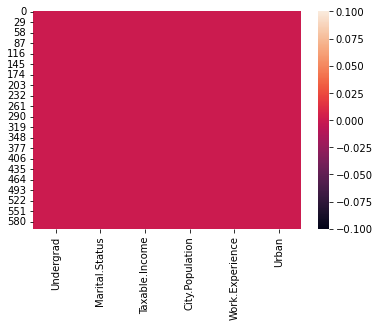

In [74]:
sns.heatmap(fraud.isna())

<AxesSubplot:>

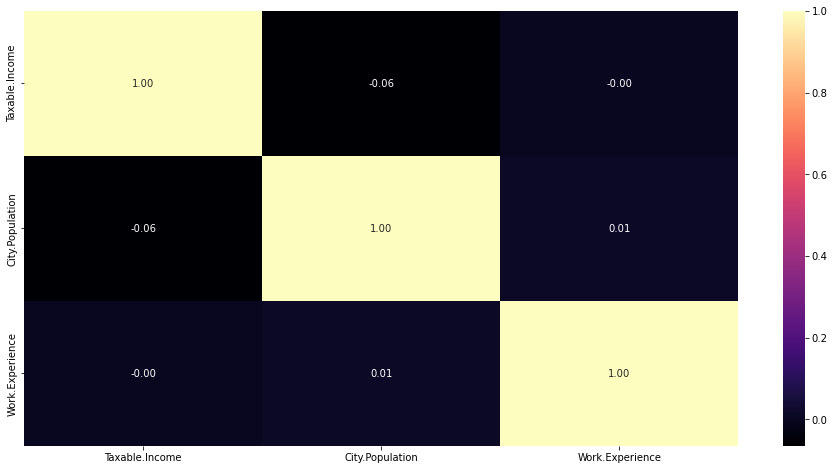

In [75]:
plt.figure(figsize=(16,8));
sns.heatmap(fraud.corr(),cmap='magma',annot=True,fmt=".2f")

<AxesSubplot:>

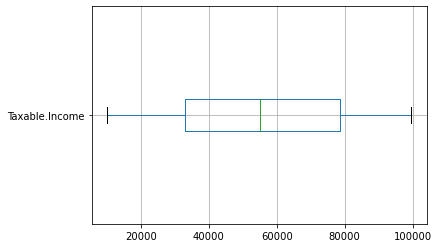

In [76]:
fraud.boxplot("Taxable.Income",vert=False)



<AxesSubplot:>

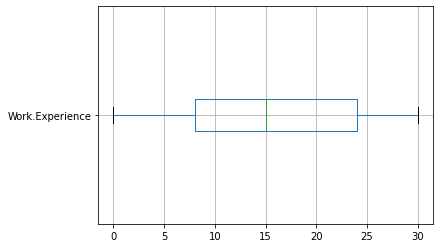

In [77]:
fraud.boxplot("Work.Experience",vert=False)

<AxesSubplot:>

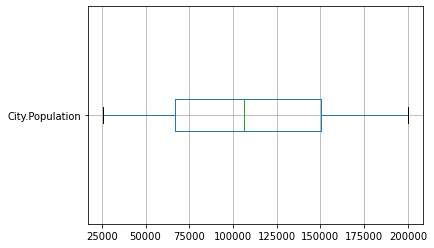

In [78]:
fraud.boxplot("City.Population",vert=False)

In [79]:
fraud["Taxable.Income"]=pd.cut(fraud["Taxable.Income"],bins=[0,30000,99620],labels=["Risky","Good"])

In [80]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [81]:
X1=fraud.iloc[:,:2]
X2=fraud.iloc[:,3:]
x=pd.concat([X1,X2],axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [82]:
y=fraud["Taxable.Income"]

In [83]:
Le=LabelEncoder()
x["Undergrad"]=Le.fit_transform(x["Undergrad"])
x["Marital.Status"]=Le.fit_transform(x["Marital.Status"])
x["Urban"]=Le.fit_transform(x["Urban"])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [85]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.80      1.00      0.89        96
       Risky       0.00      0.00      0.00        24

    accuracy                           0.80       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.64      0.80      0.71       120



In [86]:
print(lg.score(xtrain,ytrain))
print(lg.score(xtest,ytest))

0.7916666666666666
0.8


In [87]:
def predict(model):
    model=model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))


In [88]:
predict(LogisticRegression())

              precision    recall  f1-score   support

        Good       0.80      1.00      0.89        96
       Risky       0.00      0.00      0.00        24

    accuracy                           0.80       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.64      0.80      0.71       120

0.7916666666666666
0.8


In [89]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

        Good       0.78      0.78      0.78        96
       Risky       0.12      0.12      0.12        24

    accuracy                           0.65       120
   macro avg       0.45      0.45      0.45       120
weighted avg       0.65      0.65      0.65       120

1.0
0.65


In [90]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

        Good       0.80      0.95      0.87        96
       Risky       0.17      0.04      0.07        24

    accuracy                           0.77       120
   macro avg       0.48      0.49      0.47       120
weighted avg       0.67      0.77      0.71       120

1.0
0.7666666666666667


In [91]:
predict(BaggingClassifier())

              precision    recall  f1-score   support

        Good       0.80      0.91      0.85        96
       Risky       0.18      0.08      0.11        24

    accuracy                           0.74       120
   macro avg       0.49      0.49      0.48       120
weighted avg       0.67      0.74      0.70       120

0.9729166666666667
0.7416666666666667
